Bus: Jan. 01, 2014 - May 31, 2020

Street car: Jan. 02 2014 - May 31 2020

Subway: Jan. 01 2014 - June 2020 

~700k records of incident delay for the past 6 year 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import seaborn as sns

In [3]:
bus_df = pd.read_csv('./data/bus_cleaned.csv')
streetcar_df = pd.read_csv('./data/streetcar_cleaned.csv')
subway_df = pd.read_csv('./data/subway_cleaned.csv')

In [4]:
bus_df.head()

,report_date,Route,Time,Day,Location,Incident,delay_min,gap_min,Direction,Vehicle,report_year,report_month,report_day,time_hour,time_min,delay_type
0,2014-01-01,95,12:23:00 AM,Wednesday,YORK MILLS STATION,Mechanical,10.0,20.0,E,1734.0,2014,1,1,12,23,short
1,2014-01-01,102,12:55:00 AM,Wednesday,ENTIRE RUN FOR ROUTE,General Delay,33.0,66.0,b/w,8110.0,2014,1,1,12,55,long
2,2014-01-01,54,1:28:00 AM,Wednesday,LAWRENCE AND WARDEN,Mechanical,10.0,20.0,WB,7478.0,2014,1,1,1,28,short
3,2014-01-01,112,1:30:00 AM,Wednesday,KIPLING STATION,Emergency Services,18.0,36.0,N,8084.0,2014,1,1,1,30,medium
4,2014-01-01,24,1:37:00 AM,Wednesday,VP AND ELLESMERE,Investigation,10.0,20.0,n,7843.0,2014,1,1,1,37,short


In [5]:
streetcar_df.head()

,report_date,Route,Time,Day,Location,Incident,delay_min,gap_min,Direction,Vehicle,incident_id,report_year,report_month,report_day,time_hour,time_min,delay_type
0,2014-01-02,505,6:31:00 AM,Thursday,DUNDAS AND RONCESVALLES,Late Leaving Garage,4.0,8.0,E/B,4018.0,NaN,2014,1,2,6,31,short
1,2014-01-02,504,12:43:00 PM,Thursday,KING AND SHAW,Utilized Off Route,20.0,22.0,E/B,4128.0,NaN,2014,1,2,12,43,medium
2,2014-01-02,501,2:01:00 PM,Thursday,KINGSTON ROAD AND BINGHAM,Held By,13.0,19.0,W/B,4016.0,NaN,2014,1,2,2,1,medium
3,2014-01-02,504,2:22:00 PM,Thursday,KING ST. AND RONCESVALLES AVE.,Investigation,7.0,11.0,W/B,4175.0,NaN,2014,1,2,2,22,short
4,2014-01-02,504,4:42:00 PM,Thursday,KING AND BATHURST,Utilized Off Route,3.0,6.0,E/B,4080.0,NaN,2014,1,2,4,42,short


In [6]:
subway_df.head()

,report_date,Time,Day,Station,Code,delay_min,gap_min,Bound,Line,Vehicle,report_year,report_month,report_day,time_hour,time_min,is_station,delay_type
0,2020-04-01,12:04:00 AM,Wednesday,BLOOR STATION,SUDP,6,11,S,YU,5766,2020,4,1,12,4,1,short
1,2020-04-01,12:06:00 AM,Wednesday,FINCH STATION,MUI,5,10,S,YU,5401,2020,4,1,12,6,1,short
2,2020-04-01,1:55:00 AM,Wednesday,FINCH STATION,MUIS,0,0,NaN,YU,0,2020,4,1,1,55,1,short
3,2020-04-01,2:37:00 AM,Wednesday,YONGE SHP STATION,TUMVS,0,0,W,SHP,6186,2020,4,1,2,37,1,short
4,2020-04-01,5:14:00 AM,Wednesday,WILSON STATION,MUNOA,3,5,S,YU,0,2020,4,1,5,14,1,short


In [7]:
print("There's %s records of incident and %s columns in the bus dataset."%(bus_df.shape[0],bus_df.shape[1]))
print("There's %s records of incident and %s columns in the streecar dataset."%(streetcar_df.shape[0],streetcar_df.shape[1]))
print("There's %s records of incident and %s columns in the subway dataset."%(subway_df.shape[0],subway_df.shape[1]))
print("In total there are %d records of incident."%(bus_df.shape[0]+streetcar_df.shape[0]+subway_df.shape[0]))

There's 461405 records of incident and 16 columns in the bus dataset.
There's 81037 records of incident and 17 columns in the streecar dataset.
There's 129502 records of incident and 17 columns in the subway dataset.
In total there are 671944 records of incident.


### Missing values

In [7]:
missing_vals_bus = bus_df.isnull().sum() / bus_df.shape[0]
missing_vals_bus[missing_vals_bus > 0].sort_values(ascending=False)

Incident_ID    0.989149
Vehicle        0.146468
Direction      0.022102
Min_gap        0.001972
Incident       0.001972
Location       0.001666
Min_delay      0.000962
dtype: float64

In [8]:
bus_df[bus_df['Incident_ID'].notnull()]

,Report_date,Route,Time,Day,Location,Incident,Min_delay,Min_gap,Direction,Vehicle,Incident_ID
411458,2019-04-01,76,12:27:00 AM,Monday,mimico and lakeshore,Investigation,25.0,50.0,S/B,7949.0,5.0
411459,2019-04-01,135,12:55:00 AM,Monday,MSTN,Mechanical,30.0,60.0,E/B,8448.0,1.0
411460,2019-04-01,87,1:05:00 AM,Monday,MSTN,Utilized Off Route,10.0,20.0,W/B,8937.0,4.0
411461,2019-04-01,64,1:23:00 AM,Monday,MSTN,Utilized Off Route,20.0,40.0,S/B,8948.0,4.0
411462,2019-04-01,320,1:30:00 AM,Monday,Yonge/Dundas,Diversion,243.0,273.0,B/W,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...
416597,2019-04-30,34,8:47:00 PM,Tuesday,Eglinton & Pharmacy,Investigation,7.0,14.0,E/B,8630.0,5.0
416598,2019-04-30,54,8:52:00 PM,Tuesday,Eglinton and Mt.Pleasant,Investigation,14.0,27.0,W/B,8641.0,5.0
416599,2019-04-30,26,9:57:00 PM,Tuesday,St. George Station,Mechanical,13.0,30.0,N/B,1026.0,1.0
416600,2019-04-30,168,10:00:00 PM,Tuesday,Entire Route,General Delay,20.0,30.0,B/W,NaN,8.0


In [9]:
missing_vals_streetcar = streetcar_df.isnull().sum() / streetcar_df.shape[0]
missing_vals_streetcar[missing_vals_streetcar > 0].sort_values(ascending=False)

Incident_ID    0.989150
Vehicle        0.057154
Direction      0.003771
Location       0.003185
Min_gap        0.001465
Min_delay      0.000952
dtype: float64

In [10]:
# Incident ID only recorded on April 2019 too
streetcar_df[streetcar_df['Incident_ID'].notnull()]

,Report_date,Route,Time,Day,Location,Incident,Min_delay,Min_gap,Direction,Vehicle,Incident_ID
70760,2019-04-01,512,4:26:00 AM,Monday,Roncesvalles Yard.,Mechanical,10.0,20.0,E/B,4460.0,1.0
70761,2019-04-01,501,4:27:00 AM,Monday,Queen St. E and Woodfield Ave.,Mechanical,17.0,17.0,E/B,4189.0,1.0
70762,2019-04-01,501,4:37:00 AM,Monday,Queen St. E at Greenwood Ave.,Mechanical,5.0,10.0,W/B,4012.0,1.0
70763,2019-04-01,501,4:46:00 AM,Monday,Queen St E at Woodfield Ave,Mechanical,6.0,4.0,E/B,4039.0,1.0
70764,2019-04-01,510,5:00:00 AM,Monday,King and Spadina,Mechanical,11.0,NaN,N/B,4465.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
71644,2019-04-30,503,4:39:00 PM,Tuesday,King and Church,Utilized Off Route,12.0,24.0,W/B,7951.0,4.0
71645,2019-04-30,705,5:36:00 PM,Tuesday,Queen and Sherbourne,Investigation,5.0,9.0,W/B,4001.0,5.0
71646,2019-04-30,505,6:11:00 PM,Tuesday,McCaul and Dundas,Investigation,4.0,8.0,W/B,7945.0,5.0
71647,2019-04-30,510,9:46:00 PM,Tuesday,Spadna Stn,Emergency Services,9.0,18.0,N/B,4467.0,6.0


In [11]:
missing_vals_subway = subway_df.isnull().sum() / subway_df.shape[0]
missing_vals_subway[missing_vals_subway > 0].sort_values(ascending=False)

Bound    0.220121
Line     0.003747
Code     0.000008
dtype: float64

In [12]:
subway_df[subway_df['Bound'].isnull()]

,Report_date,Time,Day,Station,Code,Min_delay,Min_gap,Bound,Line,Vehicle
2,2014-01-01,2:40:00 AM,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
6,2014-01-01,7:31:00 AM,Wednesday,NORTH YORK CTR STATION,MUNCA,0,0,NaN,YU,0
7,2014-01-01,7:32:00 AM,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
8,2014-01-01,7:34:00 AM,Wednesday,QUEEN STATION,MUNCA,0,0,NaN,YU,0
9,2014-01-01,7:34:00 AM,Wednesday,RUNNYMEDE STATION,MUNCA,0,0,NaN,BD,0
...,...,...,...,...,...,...,...,...,...,...
131281,2020-06-30,1:08:00 PM,Tuesday,DUPONT STATION,PUMEL,0,0,NaN,YU,0
131290,2020-06-30,8:33:00 PM,Tuesday,ROYAL YORK STATION,MUIS,0,0,NaN,BD,0
131291,2020-06-30,9:02:00 PM,Tuesday,KENNEDY BD STATION,MUIS,0,0,NaN,BD,0
131293,2020-06-30,10:00:00 PM,Tuesday,YONGE-UNIVERSITY AND B,MUO,0,0,NaN,YU/BD,0


- One thing very strange is that both the bus and street car datasets only have Incident ID recorded on April 2019.
- Bound column in the subway dataset also has quite a lot of missing values.

### The Incident ID column in bus and street car 

In [47]:
# bus_streetcar_incidet_id_april2019.txt
streetcar_df.drop('Incident_ID',axis=1, inplace=True)

In [50]:
bus_df.drop('Incident_ID', axis=1, inplace=True)

### Report date counts

In [52]:
bus_df.Report_date.value_counts().max()

622

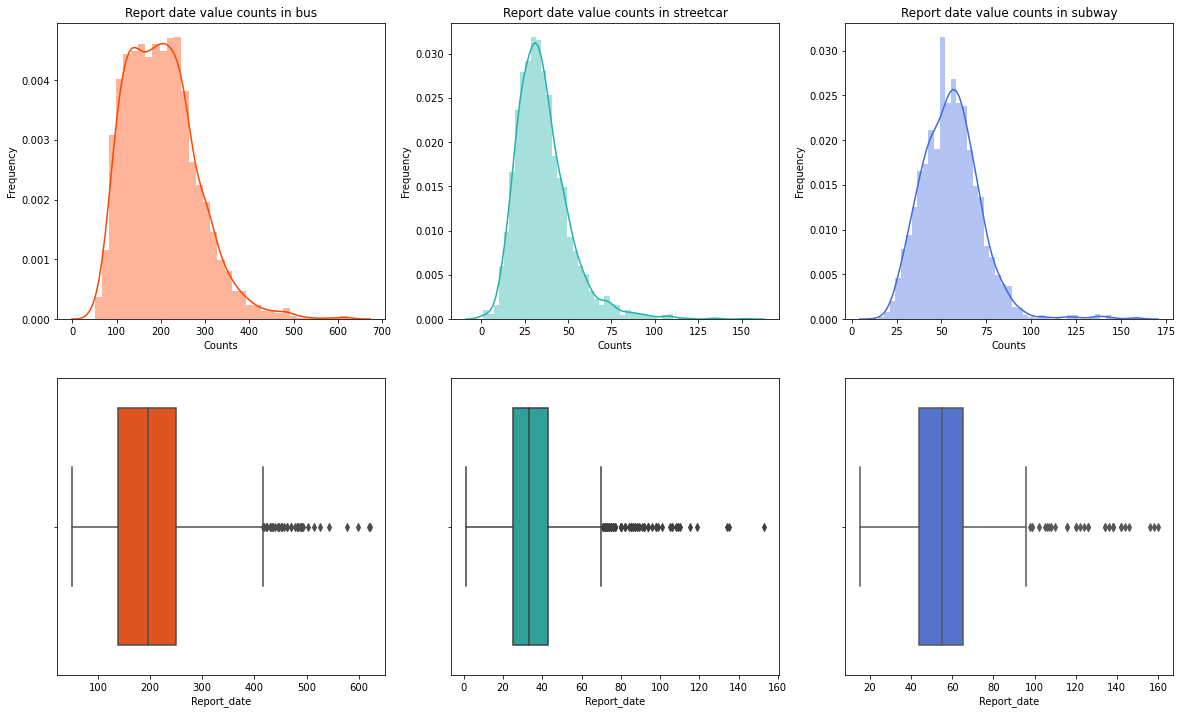

In [53]:
Report_date_counts_bus = bus_df.Report_date.value_counts()
Report_date_counts_streetcar = streetcar_df.Report_date.value_counts()
Report_date_counts_subway = subway_df.Report_date.value_counts()
fig, ax = plt.subplots(2,3, figsize=(20,12))

sns.distplot(Report_date_counts_bus, ax=ax[0,0], color="orangered", kde=True);
ax[0,0].set_xlabel("Counts")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_title("Report date value counts in bus");

sns.distplot(Report_date_counts_streetcar, ax=ax[0,1], color="lightseagreen", kde=True);
ax[0,1].set_xlabel("Counts")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("Report date value counts in streetcar");

sns.distplot(Report_date_counts_subway, ax=ax[0,2], color="royalblue", kde=True);
ax[0,2].set_xlabel("Counts")
ax[0,2].set_ylabel("Frequency")
ax[0,2].set_title("Report date value counts in subway");

sns.boxplot(Report_date_counts_bus, ax=ax[1,0], color="orangered");
sns.boxplot(Report_date_counts_streetcar, ax=ax[1,1], color="lightseagreen");
sns.boxplot(Report_date_counts_subway, ax=ax[1,2], color="royalblue");


In [54]:
np.quantile(Report_date_counts_subway, 0.75) - np.quantile(Report_date_counts_subway, 0.25)

21.0

### Route counts

### Time counts

In [55]:
bus_df.Time.value_counts()

3:00:00 PM    9519
4:00:00 PM    9051
8:00:00 AM    6599
2:00:00 PM    6373
1:00:00 PM    4263
              ... 
4:19:00 AM      19
3:59:00 AM      19
3:31:00 AM      19
3:56:00 AM      18
3:49:00 AM      15
Name: Time, Length: 1440, dtype: int64

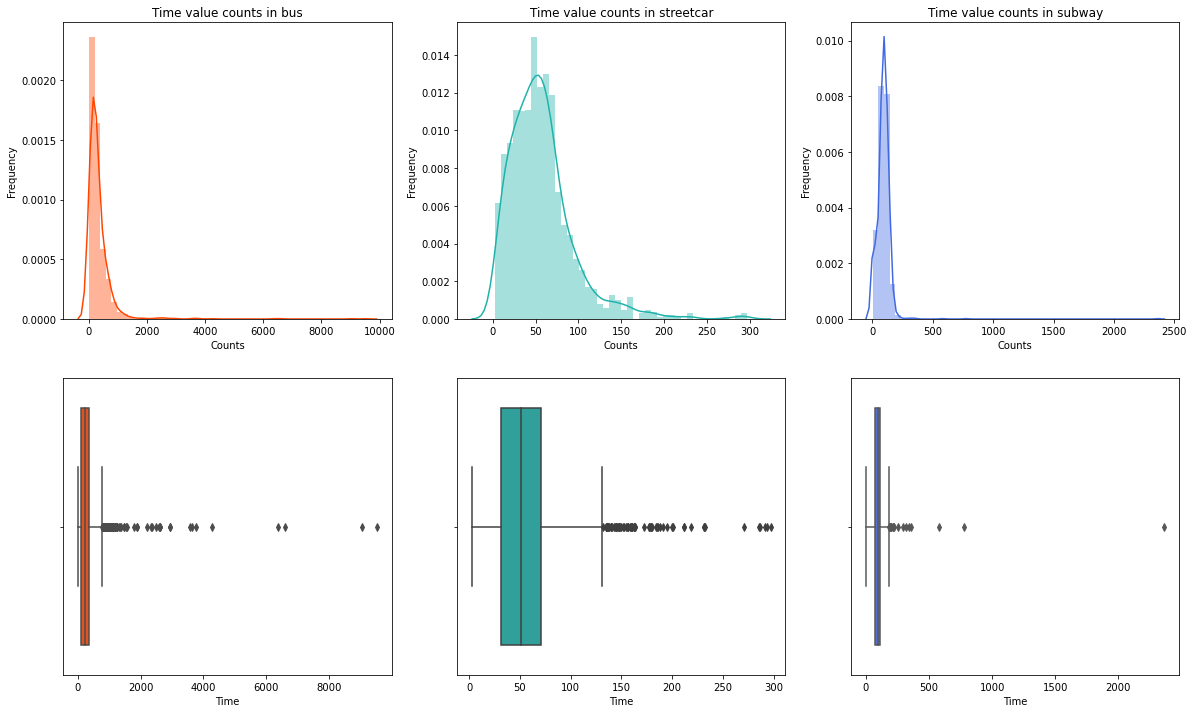

In [56]:
Time_counts_bus = bus_df.Time.value_counts()
Time_counts_streetcar = streetcar_df.Time.value_counts()
Time_counts_subway = subway_df.Time.value_counts()
fig, ax = plt.subplots(2,3, figsize=(20,12))

sns.distplot(Time_counts_bus, ax=ax[0,0], color="orangered", kde=True);
ax[0,0].set_xlabel("Counts")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_title("Time value counts in bus");

sns.distplot(Time_counts_streetcar, ax=ax[0,1], color="lightseagreen", kde=True);
ax[0,1].set_xlabel("Counts")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("Time value counts in streetcar");

sns.distplot(Time_counts_subway, ax=ax[0,2], color="royalblue", kde=True);
ax[0,2].set_xlabel("Counts")
ax[0,2].set_ylabel("Frequency")
ax[0,2].set_title("Time value counts in subway");

sns.boxplot(Time_counts_bus, ax=ax[1,0], color="orangered");
sns.boxplot(Time_counts_streetcar, ax=ax[1,1], color="lightseagreen");
sns.boxplot(Time_counts_subway, ax=ax[1,2], color="royalblue");

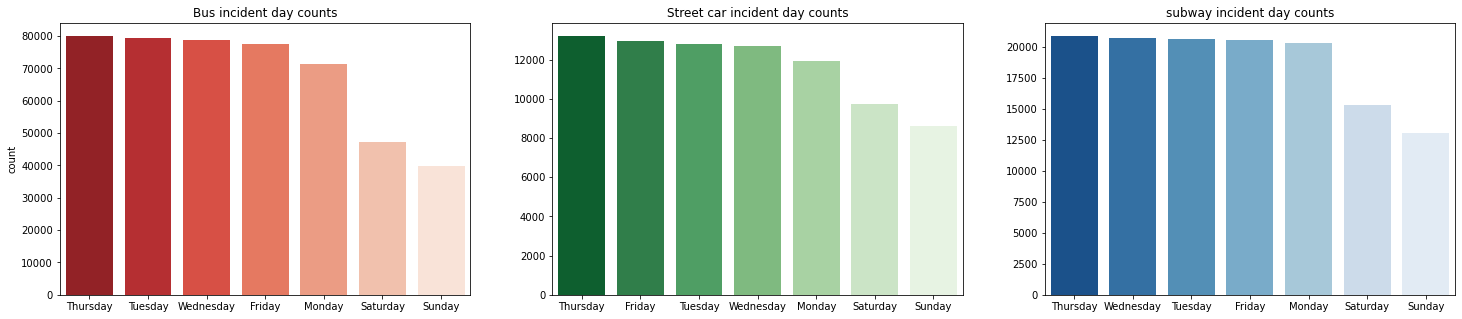

In [57]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
sns.countplot(bus_df.Day, palette="Reds_r", ax=ax[0], order = bus_df.Day.value_counts().index);
ax[0].set_xlabel('')
ax[0].set_title("Bus incident day counts");

sns.countplot(streetcar_df.Day, palette="Greens_r", ax=ax[1], order = streetcar_df.Day.value_counts().index);
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title("Street car incident day counts");

sns.countplot(subway_df.Day, palette="Blues_r", ax=ax[2], order = subway_df.Day.value_counts().index);
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].set_title("subway incident day counts");

### Top 10 Location and station

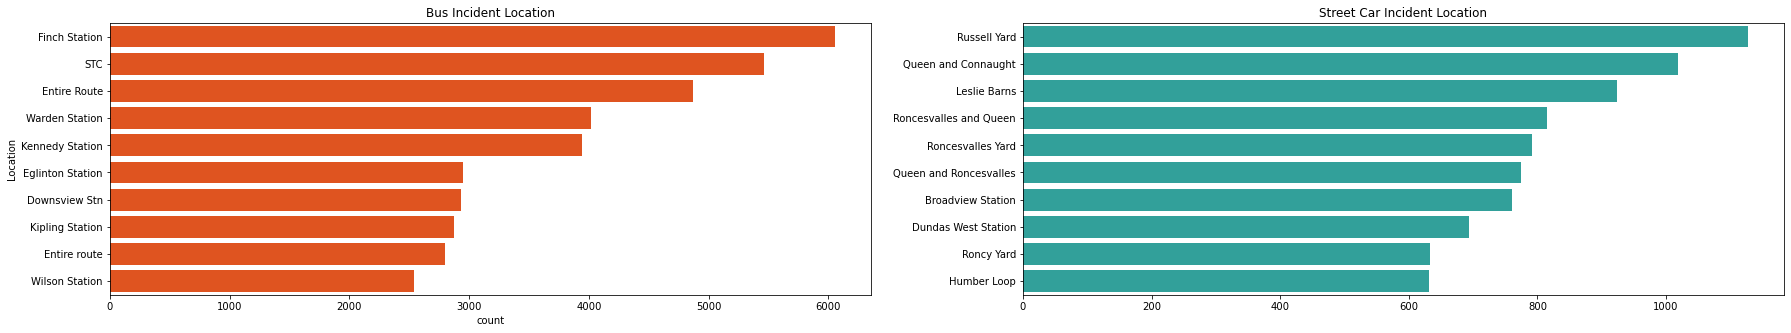

In [58]:
fig, ax = plt.subplots(1,2,figsize=(30,5))

sns.countplot(y=bus_df.Location, order= bus_df.Location.value_counts().iloc[:10].index, ax=ax[0], color="orangered");
ax[0].set_title("Bus Incident Location");
# labels = ax[0].get_xticklabels();
# ax[0].set_xticklabels(labels, rotation=90)

sns.countplot(y=streetcar_df.Location, order= streetcar_df.Location.value_counts().iloc[:10].index, ax=ax[1], color="lightseagreen");
ax[1].set_title("Street Car Incident Location");
ax[1].set_xlabel('');
ax[1].set_ylabel('');

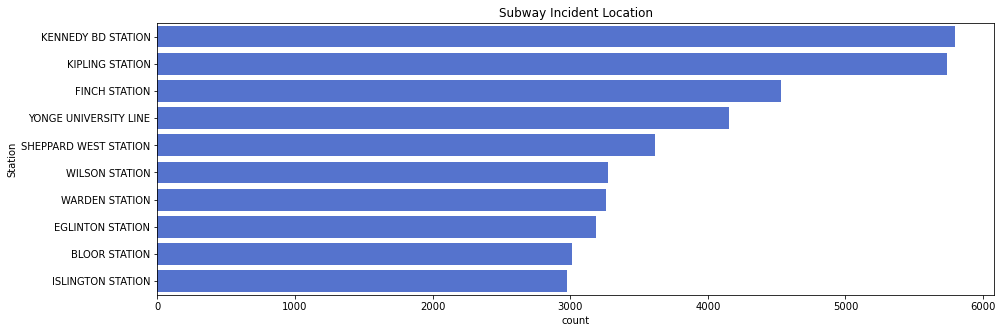

In [59]:
fig, ax =plt.subplots(1,1,figsize=(15,5))
sns.countplot(y=subway_df.Station, order= subway_df.Station.value_counts().iloc[:10].index, ax=ax, color="royalblue");
ax.set_title("Subway Incident Location");

Although Younge University Line is the fourth on our list, there's actually no delays on the record

### Incident and code

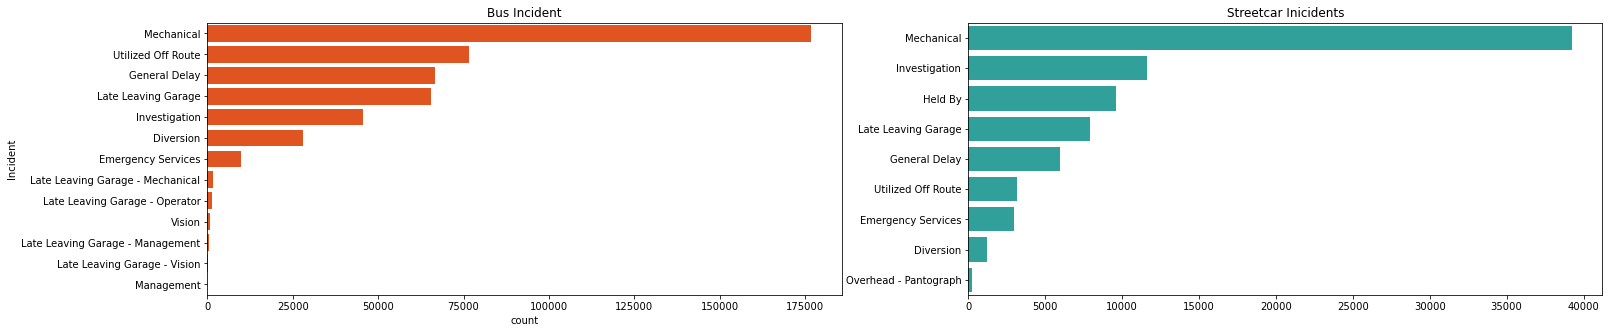

In [60]:
fig, ax = plt.subplots(1,2,figsize=(25,5))

sns.countplot(y=bus_df.Incident, order= bus_df.Incident.value_counts().index, ax=ax[0], color="orangered");
ax[0].set_title("Bus Incident");
# labels = ax[0].get_xticklabels();
# ax[0].set_xticklabels(labels, rotation=90)

sns.countplot(y=streetcar_df.Incident, order= streetcar_df.Incident.value_counts().index, ax=ax[1], color="lightseagreen");
ax[1].set_title("Streetcar Inicidents")
ax[1].set_xlabel('');
ax[1].set_ylabel('');

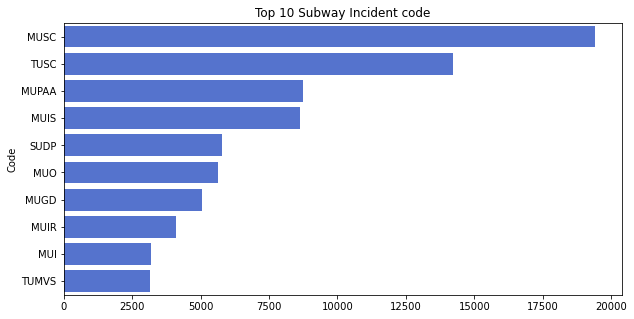

In [61]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(y=subway_df.Code, order= subway_df.Code.value_counts().iloc[:10].index, color="royalblue")
ax.set_title("Top 10 Subway Incident code")
ax.set_xlabel('');

Read more about subway delay:
https://www.lowandhigh.xyz/magazine/2019/2/7/dont-be-so-quick-to-blame-the-ttc-for-delays-on-the-subway#:~:text=Miscellaneous%20speed%20control%20is%20when,control%20to%20reset%20and%20proceed

According to TTC subway delay code description:
- MUSC: Miscellaneous Speed Control
- TUSC: Operator Overspeeding
- MUPAA: Passenger Assistance Alarm Activated - No Trouble Found
- MUIS: Injured or ill Customer (In Station) - Transported
- SUDP: Disorderly Patron
- MUO: Miscellaneous Other
- MUGD: Miscellaneous General Delays
- MUIR: Injured or ill Customer (On Train) - Medical Aid Refused
- MUI: Injured or ill Customer (On Train) - Transported
- TUMVS: Operator Violated Signal


### Min delay

In [69]:
bus_df[~bus_df['Min_delay'].isnull()]

,Report_date,Route,Time,Day,Location,Incident,Min_delay,Min_gap,Direction,Vehicle
0,2014-01-01,95,12:23:00 AM,Wednesday,York Mills station,Mechanical,10.0,20.0,E,1734.0
1,2014-01-01,102,12:55:00 AM,Wednesday,Entire run for route,General Delay,33.0,66.0,b/w,8110.0
2,2014-01-01,54,1:28:00 AM,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,WB,7478.0
3,2014-01-01,112,1:30:00 AM,Wednesday,Kipling Station,Emergency Services,18.0,36.0,N,8084.0
4,2014-01-01,24,1:37:00 AM,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,n,7843.0
...,...,...,...,...,...,...,...,...,...,...
474065,2020-05-31,25,11:13:00 PM,Sunday,Don Mills at Lawrence,Mechanical,10.0,20.0,N/B,8671.0
474066,2020-05-31,163,11:15:00 PM,Sunday,Lawrence West Station,Mechanical,14.0,28.0,S/B,8311.0
474067,2020-05-31,47,11:30:00 PM,Sunday,Yorkdale,Mechanical,20.0,40.0,S/B,1057.0
474068,2020-05-31,62,11:35:00 PM,Sunday,Broadview Station,Mechanical,20.0,40.0,E/B,8513.0


In [67]:
bus_df[~bus_df.isin(['NaN','Inf']).any(axis=1)]

,Report_date,Route,Time,Day,Location,Incident,Min_delay,Min_gap,Direction,Vehicle
0,2014-01-01,95,12:23:00 AM,Wednesday,York Mills station,Mechanical,10.0,20.0,E,1734.0
1,2014-01-01,102,12:55:00 AM,Wednesday,Entire run for route,General Delay,33.0,66.0,b/w,8110.0
2,2014-01-01,54,1:28:00 AM,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,WB,7478.0
3,2014-01-01,112,1:30:00 AM,Wednesday,Kipling Station,Emergency Services,18.0,36.0,N,8084.0
4,2014-01-01,24,1:37:00 AM,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,n,7843.0
...,...,...,...,...,...,...,...,...,...,...
474065,2020-05-31,25,11:13:00 PM,Sunday,Don Mills at Lawrence,Mechanical,10.0,20.0,N/B,8671.0
474066,2020-05-31,163,11:15:00 PM,Sunday,Lawrence West Station,Mechanical,14.0,28.0,S/B,8311.0
474067,2020-05-31,47,11:30:00 PM,Sunday,Yorkdale,Mechanical,20.0,40.0,S/B,1057.0
474068,2020-05-31,62,11:35:00 PM,Sunday,Broadview Station,Mechanical,20.0,40.0,E/B,8513.0


In [65]:
bus_df['Min_delay'].isnull().sum()
# handle missing data
# https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values 

456

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

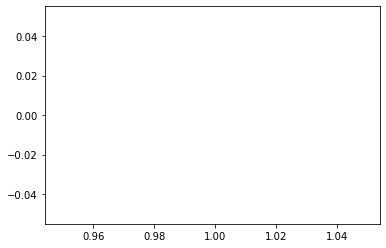

In [66]:
sns.distplot(bus_df['Min_delay'].notnull(),hist=True, bins=100)

In [ ]:
bus_df.Min_delay.value_counts().max

In [ ]:
bus_df.Route.value_counts().max()

In [ ]:
bus_df.Time.value_counts().max()

In [ ]:
bus_df.Day.value_counts().max()

In [ ]:
bus_df.Location.value_counts().max()

In [ ]:
bus_df.Incident.value_counts().max()

In [ ]:
bus_df.Min_delay.value_counts().max()

In [ ]:
bus_df.Min_gap.value_counts().max()

In [ ]:
bus_df.Direction.value_counts().max()

In [ ]:
bus_df.Vehicle.value_counts().max()

In [ ]:
bus_df.Incident_ID.value_counts().max()

In [ ]:
streetcar_df.Report_date.value_counts().max()

In [ ]:
streetcar_df.Route.value_counts().max()

In [ ]:
subway_df.Station.value_counts().max()

# A closer look into bus

In [ ]:
bus_df.head()